开始训练
模型训练耗时: 0.0014340000006995979


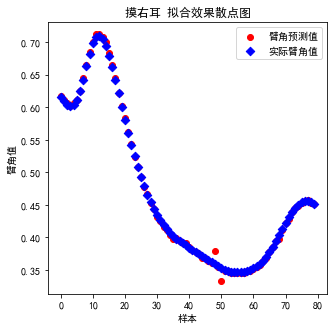

r2_score:99.8940076%
rmse score:0.3796126%
rmspe score:1.0012093%
r_score_mod score:99.8852959%


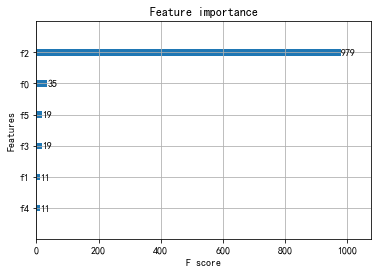

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_tree
import numpy as np
from xgboost import plot_importance
import time
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer as Imputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score#R square


def loadTestData(filePath):
    data = pd.read_csv(filepath_or_buffer=filePath,header=None)
    yList=[]
    XList=[]
    data_col=data.shape[1]
   # print(data_col)
    for col in range(0,data_col):
        tmp_list=[]
        tmp_list.append(data.iloc[5][col])
        tmp_list.append(data.iloc[6][col])
        tmp_list.append(data.iloc[7][col])
        tmp_list.append(data.iloc[17][col])
        tmp_list.append(data.iloc[18][col])
        tmp_list.append(data.iloc[19][col])
        tmpp_list=[]
        tmpp_list.append(data.iloc[7][col])
        XList.append(tmp_list)
        yList.append(tmpp_list)
    return XList,yList

def RMSPE(y_true, y_predict):
    rmspe = np.sqrt(np.mean(((y_true - y_predict)/y_true) ** 2))
    return rmspe

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) **2).mean())

def draw(ans_predict,X_test):
    plt.rcParams['font.sans-serif']='SimHei' #设置中文显示
    plt.rcParams['axes.unicode_minus']=False
    x=np.arange(0,ans_predict.shape[0]) #谁当x轴的点数
    plt.figure(figsize=(5,5))
    plt.scatter(x,ans_predict,marker='o',c='red')#ans_predict是经过训练的值，
    plt.scatter(x,X_test,marker='D',c='blue')#x为x轴的点数，x_test为对应x坐标的纵坐标值，X_test为实际值
    plt.xlabel('样本')#x轴变量的名称
    plt.ylabel('臂角值')#y轴变量的名称
    plt.title('摸右耳 拟合效果散点图')#title名称
    plt.legend(['臂角预测值','实际臂角值'])#图例
    plt.savefig('D:\毕业相关\chenminghuan\my_angle\散点图.png')#保存为png格式
    plt.show()

def trainandTest(X_test,x_test):
    # XGBoost训练过程
    print("开始训练")
    
    #plot_tree(model)
    # 对测试集进行预测
    model = xgb.XGBRegressor(max_depth=6, learning_rate=0.5, n_estimators=60, silent=False, objective="reg:squarederror", gamma=0.01)
    model.load_model('D:\毕业相关\chenminghuan\my_angle\model_regression3.model')
    timeIn= time.perf_counter() 
    ans_predict = model.predict(X_test)
    print("模型训练耗时: {}".format(time.perf_counter() - timeIn))#单位为秒
    ans_predict_len = len(ans_predict)
   # print(ans_predict)
    id_list = np.arange(1, 17441)
    data_arr = []
    for row in range(0, ans_predict_len):
        data_arr.append([int(id_list[row]),ans_predict[row]])
    np_data = np.array(data_arr)

    # 写入文件
    pd_data = pd.DataFrame(np_data, columns=['id', 'y'])
    draw(ans_predict,x_test)
    score=r2_score(x_test,ans_predict)
    ans_target=[]
    for a in x_test:
        for b in a:
            ans_target.append(b)
    r_score=r2_score(ans_target,ans_predict)
    print("r2_score:%.7f%%"%(r2_score(ans_target,ans_predict)*100.0))
    print("rmse score:%.7f%%"%(rmse(ans_target,ans_predict)*100.0))
    print("rmspe score:%.7f%%"%(RMSPE(ans_target,ans_predict)*100.0))
    
    r_score_mod=1-(1-r_score)*(ans_predict_len-1)/(ans_predict_len-1-6)
    print("r_score_mod score:%.7f%%"%(r_score_mod*100.0))
    # 显示重要特征
    plot_importance(model)
    plt.show()
    
#from libs.xgboost_plot import plot_training_merror

    
if __name__ == '__main__':
    testFilePath = 'D:\毕业相关\chenminghuan\my_angle\\rear_3_forward_5.csv'
    X_test1,x_test1 = loadTestData(testFilePath)
    X_test=np.array(X_test1)
    x_test=np.array(x_test1)
    trainandTest(X_test,x_test)